In [13]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Load and Visualize the Country Data

In [14]:
# Read the country data
country_df = pd.read_csv('Resources/result_files/step2_reformat_data_for_analysis.csv')

# Display country data
country_df.head()

,Record Date,Exchange Rate,Effective Date,Country,Currency,Country Name,Country Code,GDPGrowth,Year
0,3/31/01,78400.0,20010331,Afghanistan,Afghani,Afghanistan,AFG,0.000000,2001
1,6/30/01,73000.0,20010630,Afghanistan,Afghani,Afghanistan,AFG,0.000000,2001
2,9/30/01,71500.0,20010930,Afghanistan,Afghani,Afghanistan,AFG,0.000000,2001
3,12/31/01,38200.0,20011231,Afghanistan,Afghani,Afghanistan,AFG,0.000000,2001
4,3/31/01,142.4,20010331,Albania,Lek,Albania,ALB,8.293313,2001


In [15]:
# Select Egypt 
egypt_df = country_df.loc[country_df['Country Code'] == 'EGY']

egypt_df.head()

,Record Date,Exchange Rate,Effective Date,Country,Currency,Country Name,Country Code,GDPGrowth,Year
164,3/31/01,3.880,20010331,Egypt,Pound,Egypt,EGY,3.535252,2001
165,6/30/01,3.886,20010630,Egypt,Pound,Egypt,EGY,3.535252,2001
166,9/30/01,4.250,20010930,Egypt,Pound,Egypt,EGY,3.535252,2001
167,12/31/01,4.560,20011231,Egypt,Pound,Egypt,EGY,3.535252,2001
794,3/31/02,4.620,20020331,Egypt,Pound,Egypt,EGY,2.390204,2002


<Axes: title={'center': 'GDP Growth by Exchange Rate'}, xlabel='Exchange Rate', ylabel='GDPGrowth'>

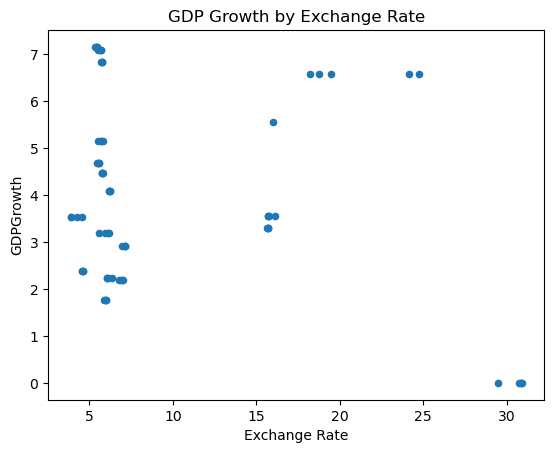

In [16]:
# Create a scatter plot with the GDP Growth data 
country_plot = egypt_df.plot.scatter(
    x="Exchange Rate",
    y="GDPGrowth",
    title="GDP Growth by Exchange Rate",
)
country_plot

## Prepare the Data to Fit the Linear Regression Model

In [17]:
# Use the 'reshape' function to reshape the X set as a single column array
X = egypt_df["Exchange Rate"].values.reshape(-1, 1)

# Display the array data
X[:5]

array([[3.88 ],
       [3.886],
       [4.25 ],
       [4.56 ],
       [4.62 ]])

In [18]:
# Create an array for the dependent variable y with the Exchange Rate data
y = egypt_df["GDPGrowth"]

## Build the Linear Regression Model

In [19]:
# Create a model with scikit-learn
model = LinearRegression()

In [20]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [21]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [-0.08086023]


In [22]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 4.734248230576621


In [23]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 4.734248230576621 + -0.08086022902182277X


## Plot the Best Fit Line for the GDP Growth Prediction Model

In [24]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [25]:
# Create a copy of the original data
egypt_gdpg_predicted = egypt_df.copy()

# Add a column with the predicted gdp values
egypt_gdpg_predicted["gdpg_predicted"] = predicted_y_values

# Display sample data
egypt_gdpg_predicted.head()

,Record Date,Exchange Rate,Effective Date,Country,Currency,Country Name,Country Code,GDPGrowth,Year,gdpg_predicted
164,3/31/01,3.880,20010331,Egypt,Pound,Egypt,EGY,3.535252,2001,4.420511
165,6/30/01,3.886,20010630,Egypt,Pound,Egypt,EGY,3.535252,2001,4.420025
166,9/30/01,4.250,20010930,Egypt,Pound,Egypt,EGY,3.535252,2001,4.390592
167,12/31/01,4.560,20011231,Egypt,Pound,Egypt,EGY,3.535252,2001,4.365526
794,3/31/02,4.620,20020331,Egypt,Pound,Egypt,EGY,2.390204,2002,4.360674


<Axes: xlabel='Exchange Rate'>

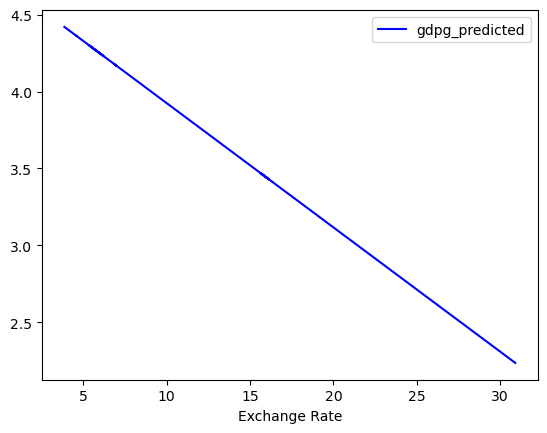

In [26]:
# Create a line plot of the predicted GDP Growth values
best_fit_line = egypt_gdpg_predicted.plot.line(
    x = "Exchange Rate",
    y = "gdpg_predicted",
    color = "blue"
)
best_fit_line

<Axes: title={'center': 'GDP Growth and Exchange Rate'}, xlabel='Exchange Rate', ylabel='GDPGrowth'>

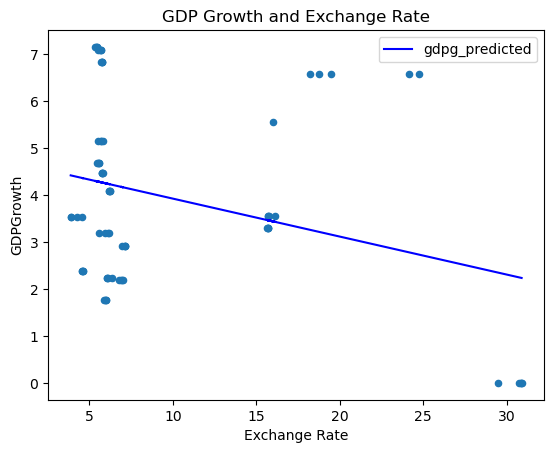

In [27]:
# Superpose the original data and the best fit line
# Create a scatter plot with the gdp growth information
gdpg_plot = egypt_gdpg_predicted.plot.scatter(
    x="Exchange Rate",
    y="GDPGrowth",
    title="GDP Growth and Exchange Rate",
)

best_fit_line =egypt_gdpg_predicted.plot.line(
    x = "Exchange Rate",
    y = "gdpg_predicted",
    color = "blue",
    ax=gdpg_plot
)
gdpg_plot

## Manual Predictions

In [28]:
# Formula to predict the GDP Growth on a given date
# At close on May 31, 2024 the USD/EGP = 47.2211
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 47.2211")

# Predict the GDP Growth on May 31, 2024 Close
may_31_2024 = model.intercept_ + model.coef_[0] * 47.2211

# Display the prediction
print(f"Predicted GDP Growth on May 31, 2024: {may_31_2024:.2f}")

Model's formula: y = 4.734248230576621 + -0.08086022902182277 * 47.2211
Predicted GDP Growth on May 31, 2024: 0.92


## Make Predictions Using the `predict` Function

In [29]:
# Array to predict GDP Growth when Egyptian Pound is at 50, 55, 60, 65 and 70 to the USD.
X_exc = np.array([50, 55, 60, 65, 70])

# Format the array as a one-column array
X_exc = X_exc.reshape(-1,1)

# Display sample data
X_exc

array([[50],
       [55],
       [60],
       [65],
       [70]])

In [30]:
# Predict GDP Growth for 50, 55, 60, 65 and 70 Egyptian Pounds to the USD.
predicted_gdpg = model.predict(X_exc)

In [31]:
# Create a DataFrame for the predicted GDP Growhth values
df_predicted_gdpg = pd.DataFrame(
    {
        "Exchange Rate": X_exc.reshape(1, -1)[0],
        "predicted_gdpg": predicted_gdpg
    }
)

# Display data
df_predicted_gdpg

,Exchange Rate,predicted_gdpg
0,50,0.691237
1,55,0.286936
2,60,-0.117366
3,65,-0.521667
4,70,-0.925968
